In [1]:
from pathlib import Path
import hydra
from omegaconf import DictConfig
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
from unet_compare.functions import ( get_brains, data_aug, mask_gen )

cfg is manually set, as jupyter and hydra do not like each other

Uses:
  BATCH_SIZE: 10
  NUM_TRAIN: 100
  NUM_MASKS: 1
  ACCEL: 5

In [ ]:
cfg = {'params': {'EPOCHS': 1, 'MOD': 1.42, 'RE_MOD': 1.0, 'BATCH_SIZE': 10, 'NUM_TRAIN': 100, 'NUM_VAL': 1, 'NUM_TEST': 1, 'NUM_MASKS': 1, 'UNIT_CONFIRM': 1, 'LR': 0.001, 'ACCEL': 5, 'BETA_1': 0.9, 'BETA_2': 0.999}, 'addrs': {'TEST': 'test/*.npy', 'TRAIN': 'train/*.npy', 'VAL': 'val/*.npy', 'STATS': 'outputs_1/stats.npy', 'COMP_MODEL': 'outputs_1/comp_model', 'REAL_MODEL': 'outputs_1/real_model', 'COMP_LOG': 'outputs_1/comp_unet.log', 'REAL_LOG': 'outputs_1/unet.log', 'FUNC': 'functions', 'COMP_CHEC': 'outputs_1/comp_check', 'REAL_CHEC': 'outputs_1/real_check', 'COMP_CSV': 'outputs_1/comp_unet_train.log', 'REAL_CSV': 'outputs_1/real_unet_train.log', 'MASKS': 'inputs/masks/*.npy', 'MASK_SAVE': 'inputs/masks', 'COMP_ARC': 'arc_outputs/arc_14886436/comp_model', 'REAL_ARC': 'arc_outputs/arc_14886436/real_model'}}

ADDR = Path.cwd()

In [ ]:
mask_gen(ADDR, cfg)

1.0
0.0


In [ ]:
(
    mask,
    stats,
    kspace_train,
    image_train,
    kspace_val,
    image_val,
    kspace_test,
    image_test,
) = get_brains(cfg, ADDR)


1


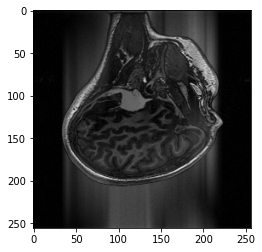

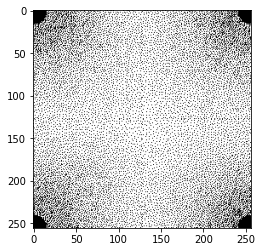

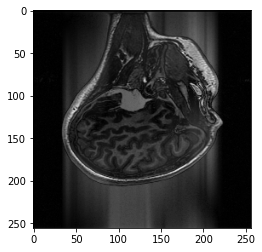

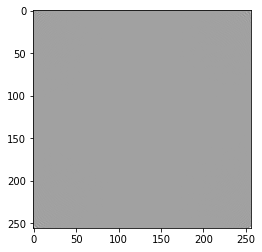

In [ ]:

aux = np.fft.ifft2(kspace_train[:, :, :, 0] + 1j * kspace_train[:, :, :, 1])
image = np.copy(kspace_train)
image[:, :, :, 0] = aux.real
image[:, :, :, 1] = aux.imag

tmask = np.max((mask[int(random.randint(0, (cfg["params"]["NUM_MASKS"] - 1)))]))

print(tmask)

plt.imshow((np.log(1+np.abs(kspace_train[0,:,:,0] + 1j*kspace_train[0,:,:,1]))),cmap = 'gray')
plt.show()

kspace_train[:, tmask, :] = 0

plt.imshow(mask[int(random.randint(0, (cfg["params"]["NUM_MASKS"] - 1)))],cmap = 'gray')
plt.show()

plt.imshow((np.log(1+np.abs(kspace_train[0,:,:,0] + 1j*kspace_train[0,:,:,1]))),cmap = 'gray')
plt.show()

kspace_train = image

plt.imshow(kspace_train[0, :, :, 0], cmap = 'gray')
plt.show()

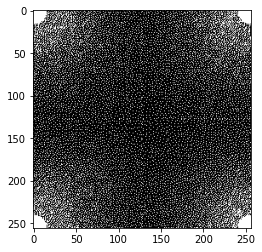

In [ ]:
plt.imshow(~mask[0], cmap = 'gray')
plt.show()

In [ ]:
combined = data_aug(image_train, mask, stats, cfg)

Image generator does not provide a kspace version of the reconstructed image. This is because 
the training process does not use it at the moment. 

Left to right: Complete image, incomplete image, incomplete kspace.

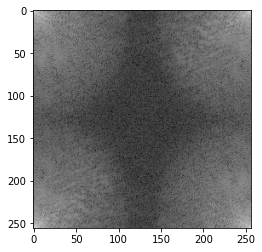

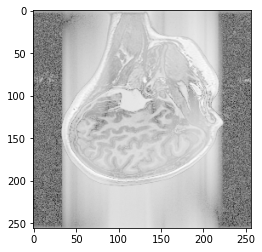

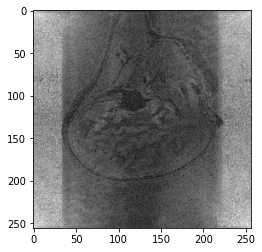

In [ ]:
plt.imshow(np.log(1+np.abs(np.fft.fft2(image_train[0, :, :, 0] + 1j * image_train[0, :, :, 1]))),cmap = 'gray')
plt.show()

plt.imshow(np.log(1+np.abs(np.fft.fft2(kspace_train[0, :, :, 0] + 1j * kspace_train[0, :, :, 1]))),cmap = 'gray')
plt.show()

plt.imshow((np.log(1+np.abs(np.fft.fft2(image_train[0, :, :, 0] + 1j * image_train[0, :, :, 1])))) - (np.log(1+np.abs(np.fft.fft2(kspace_train[0, :, :, 0] + 1j * kspace_train[0, :, :, 1])))),cmap = 'gray')
plt.show()

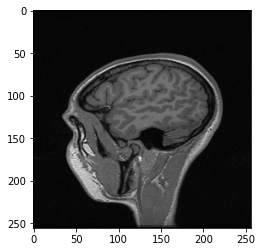

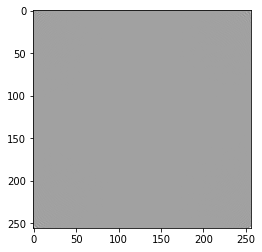

In [ ]:

plt.imshow(image_train[0, :, :, 0],cmap = 'gray')
plt.show()

plt.imshow(kspace_train[0, :, :, 0],cmap = 'gray')
plt.show()


(10, 256, 256, 2)
(10, 256, 256, 2)


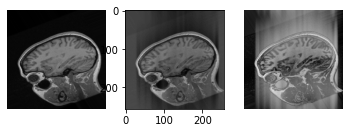

In [ ]:
# sample data augmentation
for ii in combined:
    print(ii[0].shape)
    print(ii[1].shape)
    plt.figure()
    plt.subplot(2, 3, 1)
    plt.imshow(ii[1][0,:,:,0],cmap = 'gray')
    plt.axis("off")
    plt.subplot(2, 3, 2)
    plt.imshow(ii[0][0,:,:,0],cmap = 'gray')
    '''plt.imshow(
        (
            255.0
            - np.abs(
                np.fft.ifft2(ii[0][0, :, :, 0] + 1j * ii[0][0, :, :, 1])
            )
        ),
        cmap="Greys",
    )'''
    plt.subplot(2, 3, 3)
    plt.imshow(np.log(1+np.abs(ii[0][0,:,:,0] + 1j*ii[0][0,:,:,1])),cmap = 'gray')
    plt.axis("off")
    plt.show()
    break